In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/drive/My Drive/US_Accidents_Dec19.csv')

In [0]:
data[:10]

In [0]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
data.isnull().sum().count()

49

In [6]:
data.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

In [0]:
data = data.select_dtypes(include=[np.number])
features = list(data.columns)


In [0]:
le = LabelEncoder()

for i in features:
    data[i] = le.fit_transform(data[i])
data = data.select_dtypes(include=[np.number]).interpolate().fillna(data.select_dtypes(include=[np.number]).interpolate().mean(axis=0))


In [12]:
data.isnull().sum()

TMC                  0
Severity             0
Start_Lat            0
Start_Lng            0
End_Lat              0
End_Lng              0
Distance(mi)         0
Number               0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64

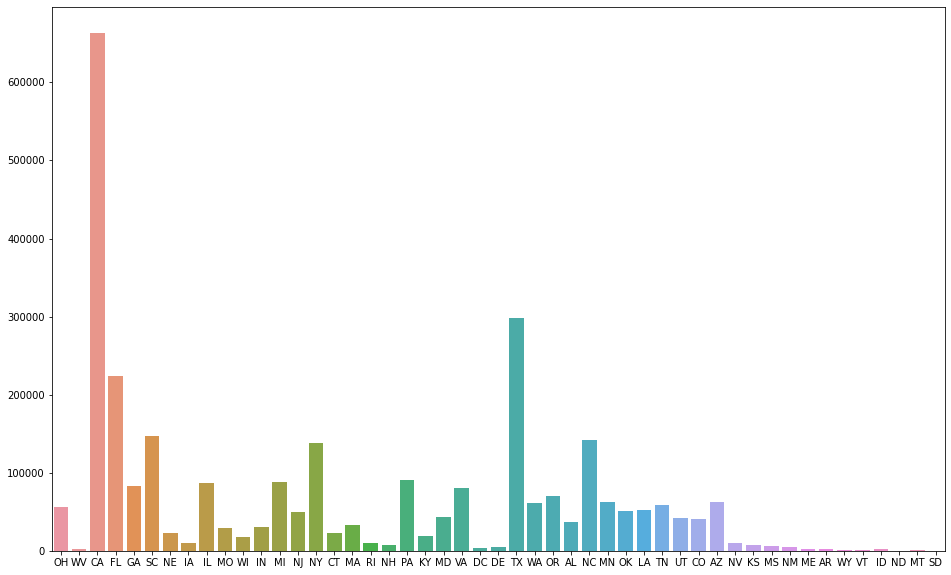

In [0]:
states = data.State.unique()
count_by_state=[]
for i in data.State.unique():
    count_by_state.append(data[data['State']==i].count()['ID'])
plt.figure(figsize=(16,10))
sns.barplot(states, count_by_state)

In [0]:
df_state=data.groupby(['State'], as_index=False).count().iloc[:,:2]
# Rename the column that make more sence
df_state=df_state.rename(columns={"ID":"NrAccidents"})
# sort by number of accidents
df_state.sort_values(by=['NrAccidents'], ascending=False, inplace=True)
df_state.head()

,State,NrAccidents
3,CA,663204
41,TX,298062
8,FL,223746
38,SC,146689
25,NC,142460


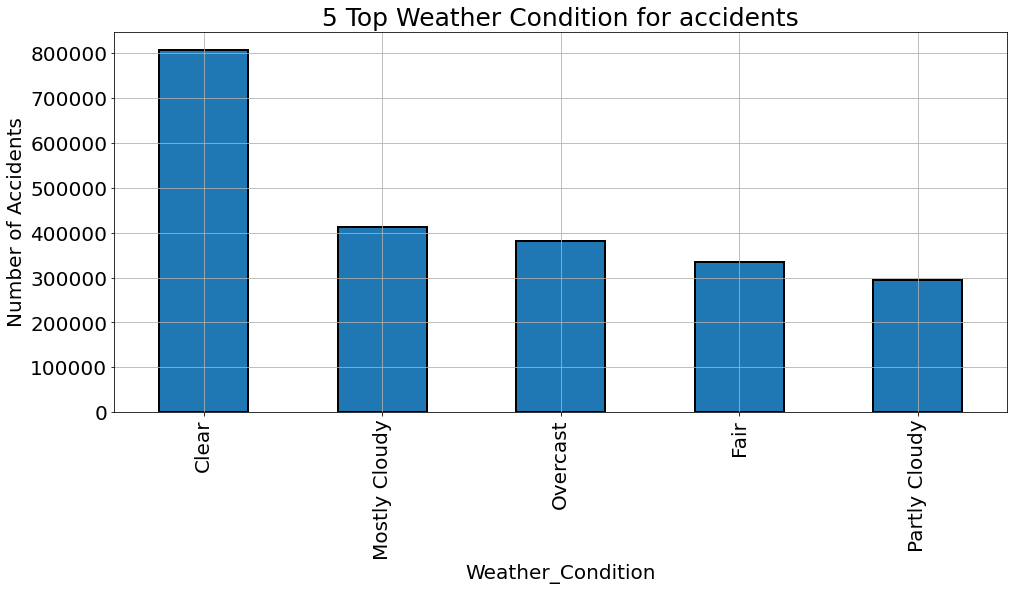

In [0]:
fig, ax=plt.subplots(figsize=(16,7))
data['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

In [0]:
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']

In [0]:
df = data[feature_lst].copy()

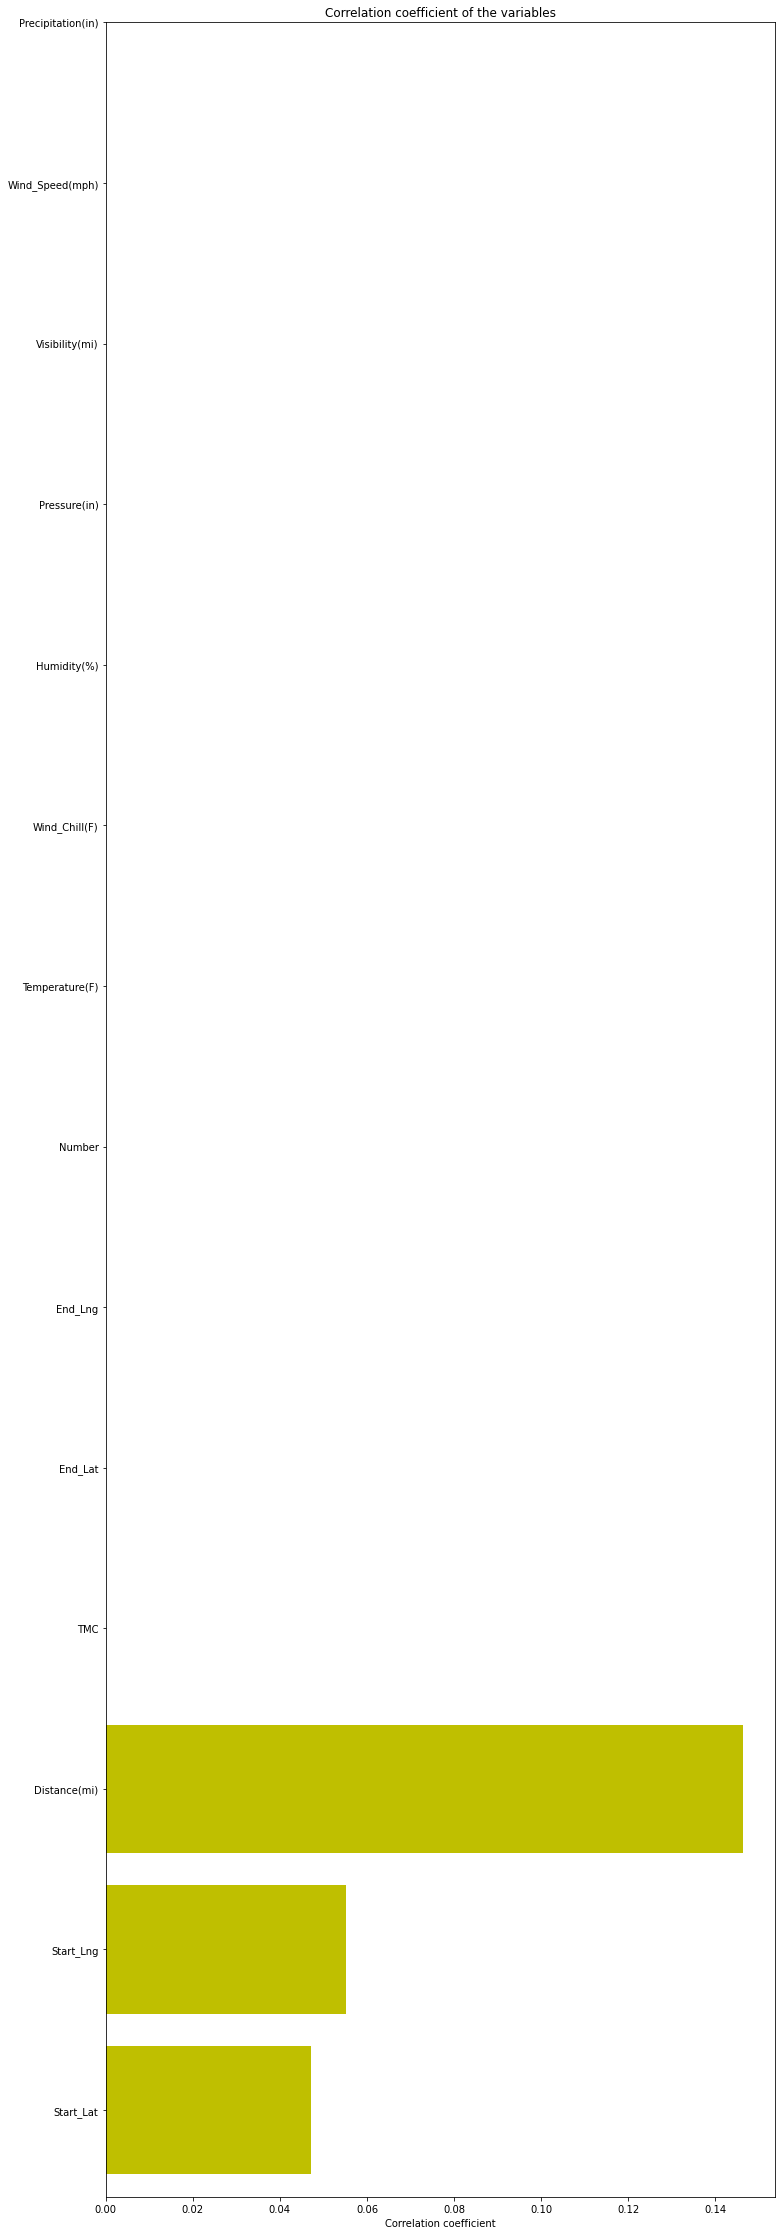

In [0]:
x_cols = [col for col in data.columns if col not in ['Severity'] and data[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(data[col].values, data.Severity.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [0]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.05) | (corr_df['corr_values'] < -0.05)]
corr_df_sel

,col_labels,corr_values
2,Start_Lng,0.055198
5,Distance(mi),0.146393


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('/content/drive/My Drive/US_Accidents_Dec19.csv')


x1 = data.drop_duplicates()
x1 = x1.dropna()
y = x1.isnull().values.any()
print(y)

from sklearn.neighbors import KNeighborsClassifier

X_train = x1.drop("Distance(mi)", axis=1)
Y_train = x1["Distance(mi)"]

X_test = X_train.drop("Side", axis=1).copy()


X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.4, random_state=0)

nav = GaussianNB()
y_pred = nav.fit(X_train, Y_train).predict(X_test)
acc_knn = round(nav.score(X_train, Y_train) * 100, 2)
print("NAV accuracy is:", acc_knn)

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("svm accuracy is:", acc_svc)
